In [26]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [28]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16488\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16488\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [29]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [30]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               4200      
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [32]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history0 = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.4254 - accuracy: 0.7892 - val_loss: 0.3736 - val_accuracy: 0.8137
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3782 - accuracy: 0.8117 - val_loss: 0.3713 - val_accuracy: 0.8163
Epoch 3/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8134 - val_loss: 0.3665 - val_accuracy: 0.8159
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8135 - val_loss: 0.4028 - val_accuracy: 0.7831
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3720 - accuracy: 0.8135 - val_loss: 0.3672 - val_accuracy: 0.8128
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8117 - val_loss: 0.3781 - val_accuracy: 0.8033
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3695 - accuracy: 0.8117 - val_loss: 0.3649 - val_accuracy: 0.8134

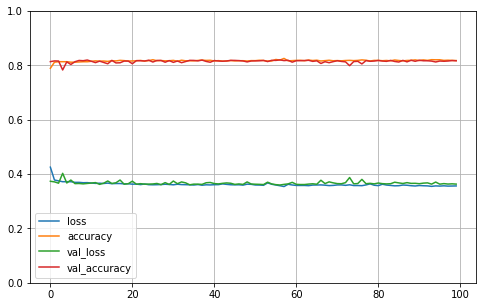

In [33]:
import pandas as pd

pd.DataFrame(history0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 988us/step - loss: 0.3631 - accuracy: 0.8168


[0.3631083071231842, 0.8167994618415833]

In [35]:

from sklearn import  metrics
ypred = model.predict(X_test)
pred_classes = np.where(ypred > 0.5, 1,0)
metrics.accuracy_score(y_true= y_test, y_pred= pred_classes )

0.8167994687915007

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

--------------
 sigmoid 


Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.4005 - accuracy: 0.8182 - val_loss: 0.3467 - val_accuracy: 0.8456
Epoch 2/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8447 - val_loss: 0.3337 - val_accuracy: 0.8458
Epoch 3/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3292 - accuracy: 0.8481 - val_loss: 0.3284 - val_accuracy: 0.8480
Epoch 4/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3248 - accuracy: 0.8488 - val_loss: 0.3252 - val_accuracy: 0.8486
Epoch 5/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3225 - accuracy: 0.8499 - val_loss: 0.3246 - val_accuracy: 0.8498
Epoch 6/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3206 - accuracy: 0.8502 - val_loss: 0.3229 - val_accuracy: 0.8491
Epoch 7/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3195 - accuracy: 0.8509 - val_loss: 0.3220 - 

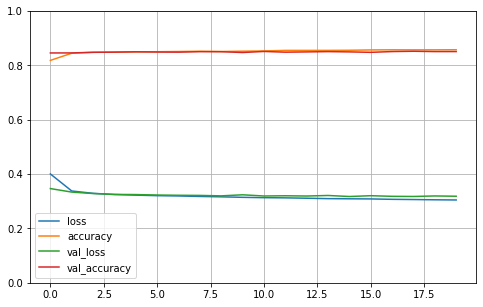

--------------
 tanh 


Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8367 - val_loss: 0.3334 - val_accuracy: 0.8453
Epoch 2/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3225 - accuracy: 0.8494 - val_loss: 0.3247 - val_accuracy: 0.8463
Epoch 3/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3149 - accuracy: 0.8516 - val_loss: 0.3231 - val_accuracy: 0.8480
Epoch 4/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3101 - accuracy: 0.8550 - val_loss: 0.3232 - val_accuracy: 0.8464
Epoch 5/20
943/943 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.8574 - val_loss: 0.3189 - val_accuracy: 0.8500
Epoch 6/20
943/943 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8586 - val_loss: 0.3200 - val_accuracy: 0.8493
Epoch 7/20
943/943 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8595 - val_loss: 0.3209 - val

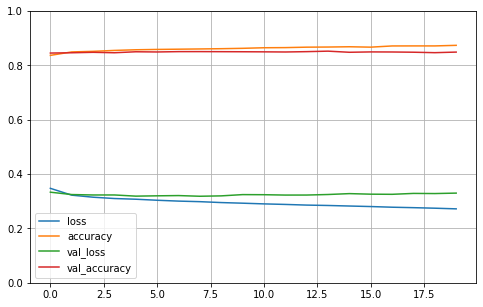

--------------
 relu 


Epoch 1/20
943/943 [==============================] - 2s 1ms/step - loss: 0.3462 - accuracy: 0.8370 - val_loss: 0.3226 - val_accuracy: 0.8495
Epoch 2/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8511 - val_loss: 0.3222 - val_accuracy: 0.8487
Epoch 3/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8540 - val_loss: 0.3229 - val_accuracy: 0.8489
Epoch 4/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3084 - accuracy: 0.8567 - val_loss: 0.3189 - val_accuracy: 0.8513
Epoch 5/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3057 - accuracy: 0.8571 - val_loss: 0.3224 - val_accuracy: 0.8505
Epoch 6/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3027 - accuracy: 0.8599 - val_loss: 0.3235 - val_accuracy: 0.8486
Epoch 7/20
943/943 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.8605 - val_loss: 0.3228 - val

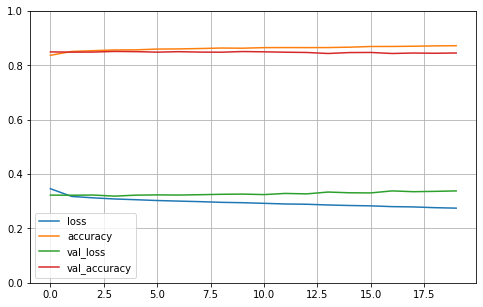

--------------
 elu 


Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3373 - accuracy: 0.8410 - val_loss: 0.3321 - val_accuracy: 0.8445
Epoch 2/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3200 - accuracy: 0.8489 - val_loss: 0.3208 - val_accuracy: 0.8501
Epoch 3/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3140 - accuracy: 0.8531 - val_loss: 0.3193 - val_accuracy: 0.8515
Epoch 4/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3109 - accuracy: 0.8550 - val_loss: 0.3199 - val_accuracy: 0.8510
Epoch 5/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3085 - accuracy: 0.8552 - val_loss: 0.3176 - val_accuracy: 0.8510
Epoch 6/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3062 - accuracy: 0.8574 - val_loss: 0.3173 - val_accuracy: 0.8514
Epoch 7/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8598 - val_loss: 0.3183 - val_

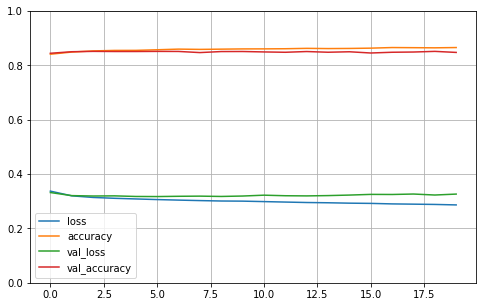

--------------
 LeakyReLU 


Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3368 - accuracy: 0.8422 - val_loss: 0.3282 - val_accuracy: 0.8486
Epoch 2/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3195 - accuracy: 0.8497 - val_loss: 0.3228 - val_accuracy: 0.8493
Epoch 3/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.8526 - val_loss: 0.3252 - val_accuracy: 0.8469
Epoch 4/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3128 - accuracy: 0.8552 - val_loss: 0.3207 - val_accuracy: 0.8512
Epoch 5/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3099 - accuracy: 0.8558 - val_loss: 0.3267 - val_accuracy: 0.8471
Epoch 6/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3091 - accuracy: 0.8566 - val_loss: 0.3251 - val_accuracy: 0.8506
Epoch 7/20
943/943 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8565 - val_loss: 0.3236 

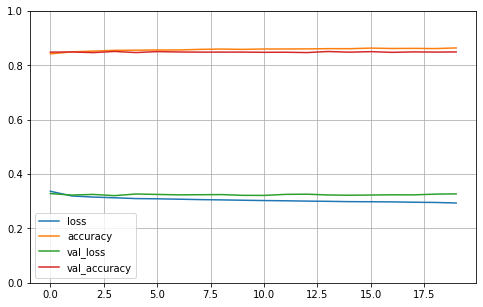

In [36]:
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import pandas as pd
from sklearn import  metrics
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU"]
# history1,history2,history3,history4,history5 = History(),History(),History(),History(),History()
# model1,model2,model3,model4,model5 = Sequential(),Sequential(),Sequential(),Sequential(),Sequential()

# histories = [history1,history2,history3,history4,history5]
# models = [model1,model2,model3,model4,model5]
dfs = []

for activ in act_fun:
    history = History()
    model = Sequential()
    model.add(Dense(100,activation=activ,input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(50,activation=activ))
    model.add(Dense(10,activation=activ))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

    print("--------------\n", activ,'\n\n')

    history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20);

    print("\n--------------\n",model.evaluate(X_test_scaled,y_test))
    ypred = model.predict(X_test_scaled)
    pred_classes = np.where(ypred > 0.5, 1,0)
    print(metrics.accuracy_score(y_true= y_test, y_pred= pred_classes ))

    dfs.append(pd.DataFrame(history.history))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

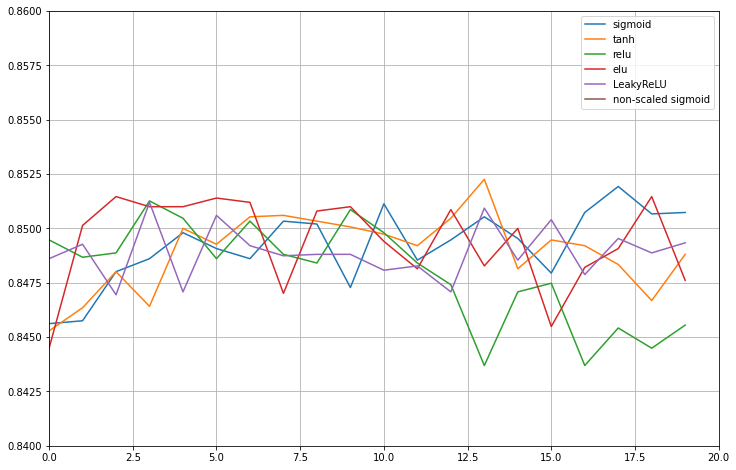

In [39]:
plt.figure(figsize=(12, 8))
act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU","non-scaled sigmoid"]
dfs.append(pd.DataFrame(history.history))

for df,fun in zip(dfs,act_fun):
    df['val_accuracy'].plot(label = fun)
    plt.grid(True)
    plt.gca().set_ylim(0.84, 0.86)
    plt.gca().set_xlim(0,20)

plt.legend()
plt.show()